# Machine Learning A-Z Python

## Classification

## Logistic Regression (Linear Classifier)

Logistic regression is used in classification. 

We generally use regression (simple, multiple, polynomial etc) to predict a continuous number. Classification is used to predict a category

**Linear classifier:** Logistic Regression, linear SVM

**Non-Linear classifier:** K-NN, Kernel SVM, Random Forest

**Business Problem:** Client has started a brand new luxary SUV. Job is to figure out who in the social network (based on available data) is willing to buy this brand new SUV.

In [1]:
# Data Preprocessing

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset= pd.read_csv('Social_Network_Ads.csv')
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


Gender is not considered here. But to make the model more accurate we can consider that.
However we can NOT visualize 3 variables at the same time (not necessary to visualize in real world dataset). 

In [2]:
# Independent variable: Age, Estimated Salary,
# Dependent variable: Purchased
X=dataset.iloc[:,2:4].values # independent variables
X.shape, X.ndim  # needs to be 2D matrix

((400, 2), 2)

In [3]:
y=dataset.iloc[:,-1].values # dependent variable
y.shape, y.ndim # needs to be 1D vector

((400,), 1)

In [4]:
print(X[:5]) # confirm it do NOT have dependent variable 
print('------------------------------------')
print(y[:5]) # confirm it only contain  dependent variable

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
------------------------------------
[0 0 0 0 0]


In [5]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size=0.25, 
                                                  random_state=0)
print(X_train.shape, y_train.shape)

(300, 2) (300,)


In [6]:
# Feature scaling: Data preprocessing
from sklearn.preprocessing import StandardScaler # StandardScaler class
sc_X = StandardScaler() # creating sc_x, a StandardScaler object
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


• Generally FEATURE SCALING is necessary (In case of regression we do not need to do it in the case of Random Forest because their splitting does NOT depend on euclidian distance)

• Look at the `AGE` range and `ESTIMATED SALARY` range. Huge difference.

• ML model depends on euclidian distance. Suppose there are 2 points, then
euclidian distance is calculated by `((y2-y1)^2+(x2-x1)^2)^1/2`. Now if one variable (here salary)
has a way higher range/scale and then it is squared and added with other variable square (age here whose 
value is negligible even after squaring) then ML will only consider salary squared value as it is so 
high and thus effect of age won't be considered. Feature scaling normalize data in a way to allow considering all variables.

• Now feature scaling can be done such that each variable is standardize and belongs to ranges from -1 to +1. And thus their high range wont affect ML model to be biased

**1. STANDARDIZATION:** `x_standardization`= `x - mean(x)` / `standard deviation(x)`<br/>
**2. NORMALIZATION:** `x_normalization` = `x - min(x)` / `max(x) - min(x)`

**CODE:**

'''<br/>
`from sklearn.preprocessing import StandardScaler`

`sc_X = StandardScaler()`

`X_train = sc_X.fit_transform(X_train)`

`X_test = sc_X.transform(X_test)`<br/>
'''

If we have to standardscaler y, add the following code to the above code--

'''<br/>
`sc_y = StandardScaler()`

`y_train = sc.y.fit_transform(y_train)`<br/>
'''

• For test set, we do NOT need to fit the sc_X instance because it's already fitted to training set
That means X_test is transformed by StandardScaler object based on its fitting to the X_train. So 
both X_train and X_test are fitted on the same scale.

• Here dependent variable or y is categorical as it has 1 or 0 values, we do NOT need to use feature scaling for classification.

• But for regression where dependent variable or y can take a huge range/scale (unlike classification), we need to use feature scaling for y as well.

In [7]:
print(X_train[:5]) # confirm X_train is standardized 
print('------------------------------------')
print(X_test[:5]) # confirm X_test is standardized 

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
------------------------------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


In [8]:
# Fitting Logistic Regression to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) # classifier is a logistic regression object
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Also, important to notice we are importing from **linear model library** because logistic regression is a **linear classifier.** 

In [9]:
# Predictig the Test set results:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

• class like `LogisticRegression`, starts with capital word <br/>
• function like `confusion_matrix` do NOT start with capital words

In [11]:
# y_test: original target | y_pred: predicted target
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

 **65+24 predicted correctly and 8+3=11 predicted incorrectly.**

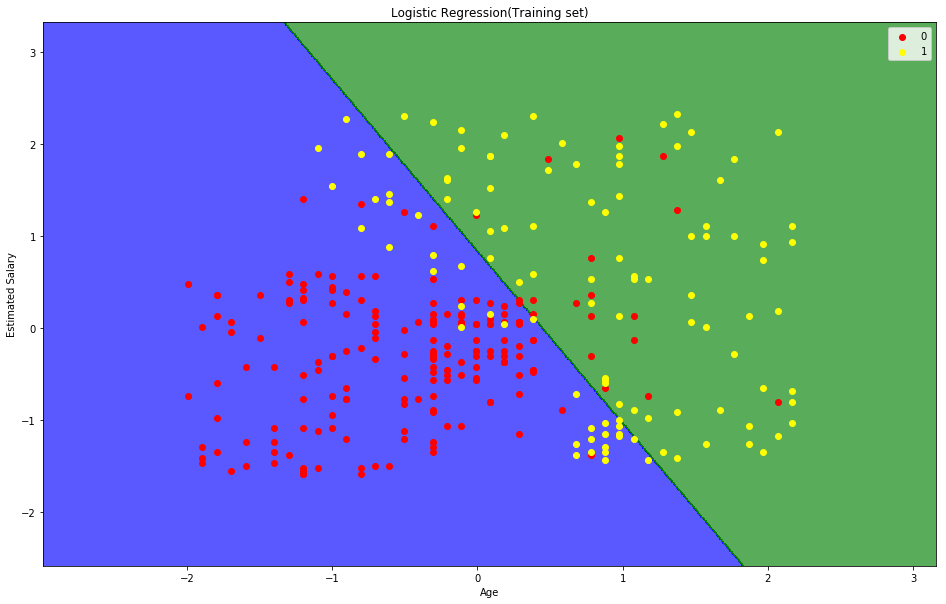

In [12]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), 
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.65, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'yellow'))(i), label=j)
    
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The red and yellow points in the plot are the observation points of the training set. Here logisitic regression classifier is been trained to classify based on this training set. 

Red points are the training set observations who DID NOT purchase (dependent variable) the SUV and was coded 0. Yellow points are the one for purchased the SUV (dependent variable) & was coded 1. 

**RED POINTS(0):** Mostly belong to the young users and low salary and they did NOT buy the SUV.<br/>
**GREEN POINTS(1):** Mostly belong to the older users and higher salary and they bought the SUV.

**ANOMALY:** <br/>
But we also see some yellow points in the blue zone, that means the older users (observation points in training data that are above age 0 on X axis) with low salary (observation points in training data that are below salary 0 on y axis) also bought SUV.

Similarly, we see some yellow points in the blue zone, that means younger users (observation points in training data that are below age 0 on X axis) with high salary (observation points in training data that are above salary 0 on y axis) also bought SUV.

**Goal of classification:** Goal is to make a classifier that will classify right class in the right category.
Classifier classified the observation, and it is represented by 2 **prediction regions.**<br/>
**BLUE PREDICTION REGION:** Is the predicted region where classifier catches all the users that do NOT buy the SUV.

**GREEN PREDICTION REGION:**Is the predicted region where classifier catches all the users that BUY the SUV.

**WARNING:** Logistic regression classifier says observations in the blue predicted region will NOT buy the SUV.
Logistic regression classifier says observations in the green predicted region will BUY the SUV.
But, thats not the case 100% in real life. That is classifier prediction but ABSOLUTE TRUTH are the observation points.

But if classifier does a decent job predicting, it can tell whether a new user will BUY a SUV or not buy a SUV based on their age and salary. If the new user belongs to the blue predicted region based on age and salary they will NOT buy the SUV. If the new user belongs to the green predicted region based on age and salary they will BUY the SUV. Thus the company can target the social media users that falls on the predicted green region, because they are the users that are predicted to buy the SUV according to the classifier.

**PREDICITON BOUNDARY based on Logistic Regression Classifier:**
The blue and green prediction region are separated by a straight line called prediction boundary. Prediction boundary is a straight line because Logistic regression classifier is a linear classifier. For NON-linear classifier the prediction boundary will NOT be a straight line. 

As we are looking into 2D because there are age and salary we get a straight line for prediction classifier. If we are looking into 3D then the prediction boundary would be a plane separating 2 spaces.

ANOMALY: We see the classifier did a good job classifying people whether they will buy the SUV or not based on the features (age and salary). However, there are some problems. We see some yellow observation (bought the SUV) are from low income level and are predicted to be in the blue predicted region according to the classifier. These INCORRECT prediction are due to the fact that it is a LINEAR classifier and our social media users are NOT linearly distributed. If they are linearly distributed then all green observation will be in green predicted region and red observations will be in the blue predicted region. 

Instead of a straight line classifier if we have a curved classifier it would do a better job of predicting as they can fit in the rebellious obeservations in the correct prediction region.

In [13]:
# Vizualization code explanation

We took all the pixels in the frame. Each pixel is a hypothetical observation with an age and salary. And then we apply classifier on it. Now for all these hypothetical points (pixels) we apply logistic regression classifier to predict whether these points will have a value 0 OR 1. If it predicts 0 it will color it blue, if it predicts 1, it will color it green. By doing this to all pixel points, all pixel points that have a 0 prediction will be colored blue and all with 1 prediction will be colored green. And they are separated by a straight line with is the PREDICTION BOUNDARY.

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

We need this code to plot the test data too, so we create the alias X_set, y_set, so that we can copy the code, and we do NOT have to replace every X_train, y_train with X_test and y_test.

In [15]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), 
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))

Here we prepare all the grids with the pixel points. 

1. `start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1`:  Subtracting 1 to minimum and adding 1 to maximum so that observation points are NOT squeezed on the side of the plot, along the X axis.

2. `start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1`: Subtracting 1 to minimum and adding 1 to maximum so that observation points are NOT squeezed on the top and bottom of the plot, along the y axis.

3. 0.01 is the resolution

In [16]:
X1[:2]

array([[-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084]])

In [17]:
X1[:2].ravel() # numpy.ravel flattens multidimensional arrays into 1D arrays

array([-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
        3.14681084,  3.15681084])

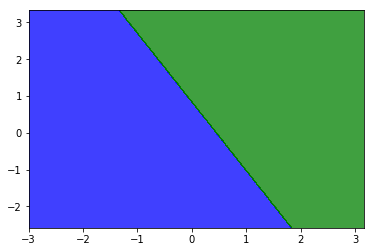

In [18]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.show()

Here we apply classifier to all the hypothetical pixel observation points. Then logisitc regression predicts if each of the pixel point belongs to class 0 or 1, if pixel point belongs belongs to class 0 it will be blue otherwise green.

(-2.5825424477554764, 3.3274575522443977)

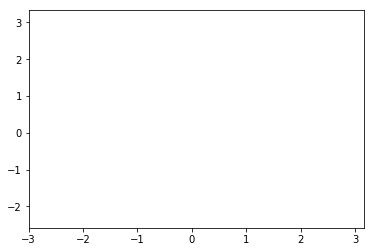

In [19]:
# X and y axis limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

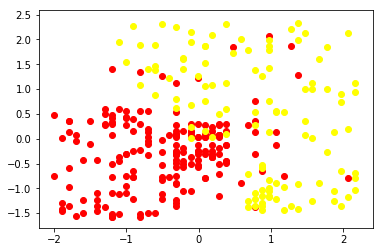

In [20]:
# for loop is used to plot all REAL observations
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'yellow'))(i), label=j)

plt.show()

No handles with labels found to put in legend.


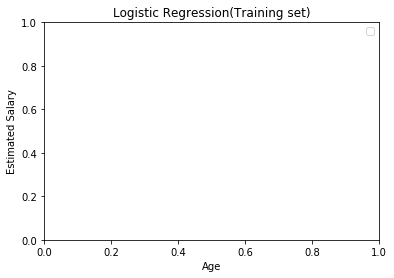

In [21]:
# Basics labelling
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

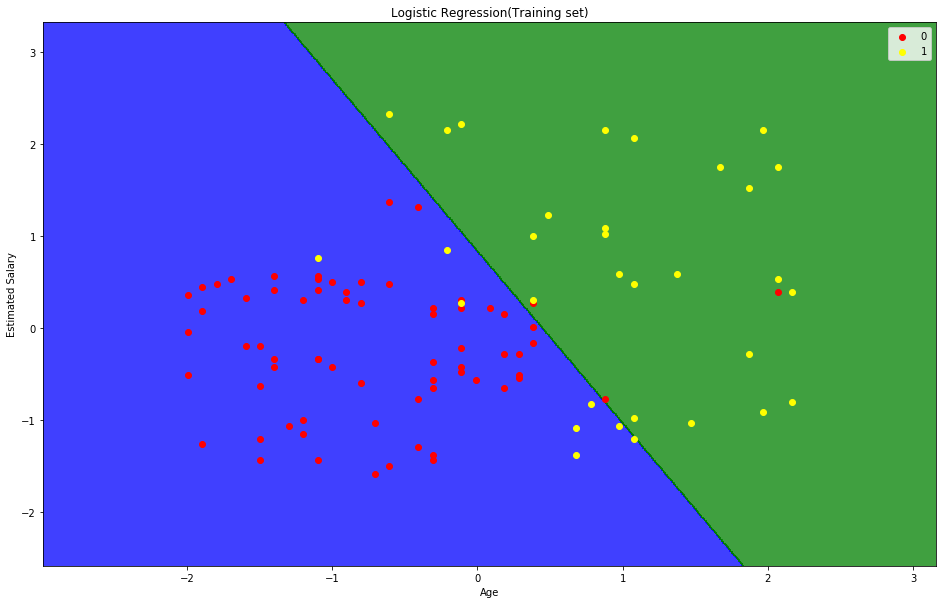

In [22]:
# Visualizing the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
# we need this code to plot the test data too, so we create the alias X_set, y_set

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), 
                     # For age column we are plotting the pixels, 0.01 is the resolution
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
                     # For salary column we are plotting the pixels
plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
# Here we apply logisitc regression classifier to all the pixel points, 
# if pixel point belongs belongs to class 0 it will be red otherwise green

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'yellow'))(i), label=j)

plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**RESULT:** The Logistic regression classifier did a DECENT job classifying test observation based on their features (age and salary). There are a lot of correct prediction i.e. red points in the blue region and yellow points in the green region. 

But we see some red points on the green region and some yellow points on the blue region. These are the incorrect predictions (total 11 incorrect predictions) that we saw in the confusion matrix.